In [1]:
import sys
sys.path.append("../../src")
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import numpy as np
import pickle
from example_pendulum import get_pendulum_data, pendulum_to_movie
from scipy.integrate import odeint
from autoencoder_pendulum import full_network
from training_pendulum import create_feed_dictionary
from sindy_utils import sindy_simulate_order2
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

/home/marsgao/.conda/envs/mars/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/marsgao/.conda/envs/mars/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/marsgao/.conda/envs/mars/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/marsgao/.conda/envs/mars/lib/python3.6/site-packages

In [2]:
data_path = os.getcwd() + '/'
save_name = 'model7'
params = pickle.load(open(data_path + save_name + '_params.pkl', 'rb'))
params['save_name'] = data_path + save_name

autoencoder_network = full_network(params)
learning_rate = tf.placeholder(tf.float32, name='learning_rate')
saver = tf.train.Saver(var_list=tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES))

tensorflow_run_tuple = ()
for key in autoencoder_network.keys():
    tensorflow_run_tuple += (autoencoder_network[key],)

## Single trajectory plots

In [36]:
arr = np.load("save_9.npy")
arr_truncate = arr[1:-9]
arr_truncate[-1]

array([[-1.63069446e-04],
       [ 1.12575116e-02],
       [-1.38369109e-03],
       [ 2.99760699e-03],
       [ 9.57082212e-03],
       [ 1.44974131e-03],
       [-6.96545234e-03],
       [ 2.16691126e-03],
       [ 6.55209692e-03],
       [-6.45362306e-03],
       [-1.06668115e+00],
       [-4.69243107e-03]])

In [44]:
arr_mean = np.mean(arr_truncate, axis=0)
arr_std = np.std(arr_truncate, axis=0)

In [45]:
arr_mean

array([[-3.26587907e-04],
       [-2.77077217e-03],
       [ 1.22364424e-03],
       [ 2.78265607e-04],
       [ 1.40925551e-04],
       [ 9.11282196e-04],
       [-1.54831972e-03],
       [ 1.20349601e-03],
       [-1.04636840e-03],
       [ 1.11051817e-03],
       [-1.06823647e+00],
       [-5.28458478e-05]])

In [46]:
arr_mean + 2*arr_std

array([[ 0.00978006],
       [ 0.02141654],
       [ 0.0140759 ],
       [ 0.01490422],
       [ 0.01572091],
       [ 0.01582892],
       [ 0.01258736],
       [ 0.01211584],
       [ 0.00959457],
       [ 0.01890854],
       [-1.06440351],
       [ 0.00918543]])

In [47]:
arr_mean - 2*arr_std

array([[-0.01043323],
       [-0.02695808],
       [-0.01162861],
       [-0.01434768],
       [-0.01543906],
       [-0.01400635],
       [-0.015684  ],
       [-0.00970885],
       [-0.01168731],
       [-0.01668751],
       [-1.07206944],
       [-0.00929112]])

In [50]:
arr = np.load("save_refinement_7.npy")
arr_truncate = arr[1:-9]
arr_mean = np.mean(arr_truncate, axis=0)
arr_std = np.std(arr_truncate, axis=0)
arr_mean

array([[-0.05529114],
       [ 0.0287457 ],
       [-0.05522526],
       [-0.14406181],
       [ 0.08301357],
       [ 0.05710671],
       [-0.11501673],
       [ 0.03820378],
       [-0.05932415],
       [-0.04977829],
       [-1.04931027],
       [ 0.05550387]])

In [51]:
arr_mean + 2*arr_std

array([[-0.051634  ],
       [ 0.03190202],
       [-0.0490993 ],
       [-0.13757962],
       [ 0.09198408],
       [ 0.06120402],
       [-0.11195002],
       [ 0.04395649],
       [-0.05189443],
       [-0.04086517],
       [-1.04760413],
       [ 0.06065525]])

In [52]:
arr_mean - 2*arr_std

array([[-0.05894828],
       [ 0.02558939],
       [-0.06135121],
       [-0.15054401],
       [ 0.07404306],
       [ 0.0530094 ],
       [-0.11808343],
       [ 0.03245107],
       [-0.06675387],
       [-0.05869142],
       [-1.05101642],
       [ 0.05035249]])

-0.05529114104807377 0.0018285704701230998
0.028745704982429742 0.0015781577504470885
-0.05522525604814291 0.0030629788795390363
-0.14406181260943413 0.0032410974575796422
0.08301357001066208 0.004485255714389023
0.05710670944303274 0.002048653515668876
-0.11501672670245171 0.0015333516211223895
0.03820378005504608 0.002876356975221751
-0.05932414650917053 0.0037148594362985832
-0.0497782938927412 0.004456561520055247
-1.0493102741241456 0.0008530731074999629
0.05550387091934681 0.0025756905082294427


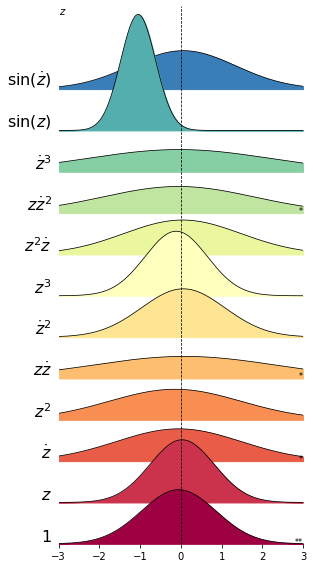

In [108]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

library_names = [r"$1$", r"$z$", r"$\dot{z}$", r"$z^2$", r"$z\dot{z}$", r"$\dot{z}^2$",
                r"$z^3$",r"$z^2\dot{z}$",r"$z\dot{z}^2$",r"$\dot{z}^3$",r"$\sin(z)$",r"$\sin(\dot{z})$",]

def curve(arr):
    n = 1
    center = np.mean(arr)
    scale = np.std(arr)
    print(center, scale)
    scale *= 500
    X = np.zeros(500)
    x = np.linspace(-3, 3, len(X))
    X = 1.0/(scale*np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x - center) / scale)**2)
    return X

cmap = mpl.cm.get_cmap("Spectral")
fig = plt.figure(figsize=(8, 8))
arr_truncate = arr_truncate.reshape((100, 12))

ax = None
for n in range(1):
    ax = plt.subplot(1, 2, n + 1, frameon=False, sharex=ax)
    for i in range(len(arr_mean)):
        Y = curve(arr_truncate[:,i])
#         hist, bin_edges = np.histogram(arr_truncate[:,i], density=True)
#         Y = hist/len(arr_truncate[:,i])
        X = np.linspace(-3, 3, len(Y))
        ax.plot(X, 3 * Y + i, color="k", linewidth=0.75, zorder=100 - i)
        color = cmap(i / len(arr_mean))
        ax.fill_between(X, 3 * Y + i, i, color=color, zorder=100 - i)

        # Some random text on the right of the curve
        v = np.random.uniform(0, 1)
        if v < 0.4:
            text = "*"
            if v < 0.05:
                text = "***"
            elif v < 0.2:
                text = "**"
            ax.text(
                3.0,
                i,
                text,
                ha="right",
                va="baseline",
                size=8,
                transform=ax.transData,
                zorder=300,
            )

    ax.yaxis.set_tick_params(tick1On=False)
    ax.set_xlim(-3, 3)
    ax.set_ylim(3, 13)
    ax.axvline(0.0, ls="--", lw=0.75, color="black", zorder=250)
    ax.text(
        0.0,
        1.0,
        r"$z$",
        ha="left",
        va="top",
        weight="bold",
        transform=ax.transAxes,
    )

    if n == 0:
        ax.yaxis.set_tick_params(labelleft=True)
        ax.set_yticks(np.arange(len(arr_mean)))
#         ax.set_yticklabels(["Serie %d" % i for i in range(1, len(arr_mean)+1)])
        ax.set_yticklabels(library_names)
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(16)
            tick.label.set_verticalalignment("bottom")
    else:
        ax.yaxis.set_tick_params(labelleft=False)


plt.tight_layout()
plt.show()

['$\\dot{x}$',
 '$\\dot{x}$',
 '$\\dot{x}$',
 '$\\dot{x}$',
 '$\\dot{x}$',
 '$\\dot{x}$',
 '$\\dot{x}$',
 '$\\dot{x}$',
 '$\\dot{x}$',
 '$\\dot{x}$',
 '$\\dot{x}$',
 '$\\dot{x}$']

### 

In [90]:
hist, bin_edges = np.histogram(arr_truncate[:,1], bins='auto', density=True)

In [91]:
hist/len(arr_truncate[:,1])

array([0.60972549, 0.97556078, 0.97556078, 1.58528626, 2.31695685,
       1.82917646, 2.80473724, 1.09750587])

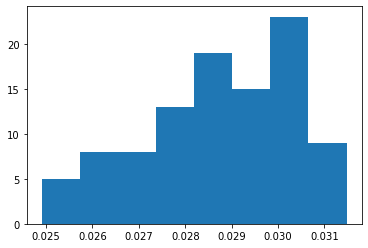

In [92]:
plt.hist(arr_truncate[:,1], bins='auto')
plt.show()